In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
import mord

dataFrame = pd.read_csv("NFLDraftDataCleaned.csv")

In [4]:
#Create new dataframes to hold independent and dependent variables
X = dataFrame[['position', 'age', 'height', 'weight', 'collegeAttended', 'rushingAttempts', 'rushingYards',
                           'avgYardsPerRush', 'rushingTouchdowns', 'receptions', 'receivingYards', 'avgYardsPerReception',
                           'receivingTouchdowns', 'fortyYardDash', 'verticalJump', 'benchPress', 'broadJump', 'threeCone',
                           'shuttle']]
# X = dataFrame[['age', 'height', 'weight', 'rushingAttempts', 'rushingYards',
#                            'avgYardsPerRush', 'rushingTouchdowns', 'receptions', 'receivingYards', 'avgYardsPerReception',
#                            'receivingTouchdowns', 'fortyYardDash', 'verticalJump', 'benchPress', 'broadJump', 'threeCone',
#                            'shuttle']]
y = dataFrame[['draftRound']]

In [5]:
#Some of the dependent variables (position and collegeAttended) are stored as categorical data
#This needs to be converted to numerical data using OneHotEncoder
onehot = pd.get_dummies(X['position'])
X = X.drop('position', axis = 1)
X = X.join(onehot)

onehot = pd.get_dummies(X['collegeAttended'])
X = X.drop('collegeAttended', axis = 1)
X = X.join(onehot)

In [6]:
#Split the dataset into some training data and testing data
#2016 draft data starts at row 794 out of 936
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.15, shuffle = False)

In [7]:
#Create a linear regression model and fit it to the train data
linearModel = LinearRegression().fit(X_Train, y_Train)

#Predict the draft round for the test set
unformattedPredictions = linearModel.predict(X_Test)

linearPredictions = []

#There are some errors with our predictions, they are giving wildly higher scores
for prediction in unformattedPredictions:
    if(prediction < 1.5):
        linearPredictions.append(1)
    if(prediction >= 1.5 and prediction < 2.5):
        linearPredictions.append(2)
    if(prediction >= 2.5 and prediction < 3.5):
        linearPredictions.append(3)
    if(prediction >= 3.5 and prediction < 4.5):
        linearPredictions.append(4)
    if(prediction >= 4.5 and prediction < 5.5):
        linearPredictions.append(5)
    if(prediction >= 5.5 and prediction < 6.5):
        linearPredictions.append(6)
    if(prediction >= 6.5):
        linearPredictions.append(7)   
        
print("LINEAR REGRESSION SCORES:")
explainedVarianceScore = metrics.explained_variance_score(y_Test, linearPredictions)
print("Explained variance score = ", explainedVarianceScore)

meanAbsoluteError = metrics.mean_absolute_error(y_Test, linearPredictions)
print("Mean absolute error = ", meanAbsoluteError)

rSquared = metrics.r2_score(y_Test, linearPredictions)
print("R Squared = ", rSquared)

f1Score = metrics.f1_score(y_Test, linearPredictions, average="micro")
print("F1 score = ", f1Score)

print()
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_Test, linearPredictions))

LINEAR REGRESSION SCORES:
Explained variance score =  0.020009293140500484
Mean absolute error =  1.49645390070922
R Squared =  -0.12811465412092704
F1 score =  0.23404255319148937

Confusion Matrix:
[[ 4  7  3  1  0  1  0]
 [ 5  4  4  4  0  0  0]
 [ 2  2  6  7  3  0  0]
 [ 1  5  7 12  4  0  1]
 [ 0  3  7  8  5  2  0]
 [ 2  0  4  3  3  1  0]
 [ 0  3  5  6  5  0  1]]


In [8]:
#Create an ordinal logistic regression model and fit it to the training data
ordinalModel = mord.OrdinalRidge()
ordinalModel.fit(X_Train, y_Train)

#Create some predictions based on the ordinal logistic regression model
ordinalPredictions = ordinalModel.predict(X_Test)

print("ORDINAL LOGISTIC REGRESSION SCORES:")
explainedVarianceScore = metrics.explained_variance_score(y_Test, ordinalPredictions)
print("Explained variance score = ", explainedVarianceScore)

meanAbsoluteError = metrics.mean_absolute_error(y_Test, ordinalPredictions)
print("Mean absolute error = ", meanAbsoluteError)

rSquared = metrics.r2_score(y_Test, ordinalPredictions)
print("RSquared = ", rSquared)

f1Score = metrics.f1_score(y_Test, ordinalPredictions, average="micro")
print("F1 score = ", f1Score)

print()
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_Test, ordinalPredictions))

ORDINAL LOGISTIC REGRESSION SCORES:
Explained variance score =  0.06299006795608975
Mean absolute error =  1.4539007092198581
RSquared =  -0.06259801359121808
F1 score =  0.24113475177304963

Confusion Matrix:
[[ 0  0  0  0  0  0  0  0]
 [ 1  1  6  6  1  0  1  0]
 [ 1  2  4  7  3  0  0  0]
 [ 0  2  2  6  8  2  0  0]
 [ 0  0  4  7 15  3  1  0]
 [ 0  0  3  7  9  6  0  0]
 [ 0  1  1  2  6  2  1  0]
 [ 0  0  3  5  5  6  0  1]]


In [9]:
#Create an multinominal logistic regression model and fit it to the training data
logisticModel = LogisticRegression(solver = "newton-cg", multi_class = "multinomial", max_iter = 100)
logisticModel.fit(X_Train, y_Train)

#Create some predictions based on the ordinal logistic regression model
logisticPredictions = logisticModel.predict(X_Test)

print("MULTINOMIAL LOGISTIC REGRESSION SCORES:")
explainedVarianceScore = metrics.explained_variance_score(y_Test, logisticPredictions)
print("Explained variance score = ", explainedVarianceScore)

meanAbsoluteError = metrics.mean_absolute_error(y_Test, logisticPredictions)
print("Mean absolute error = ", meanAbsoluteError)

rSquared = metrics.r2_score(y_Test, logisticPredictions)
print("RSquared = ", rSquared)

f1Score = metrics.f1_score(y_Test, logisticPredictions, average="micro")
print("F1 score = ", f1Score)

print()
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_Test, logisticPredictions))

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MULTINOMIAL LOGISTIC REGRESSION SCORES:
Explained variance score =  -0.32055526514491484
Mean absolute error =  1.872340425531915
RSquared =  -0.6133472730440845
F1 score =  0.14184397163120568

Confusion Matrix:
[[9 2 2 1 1 0 1]
 [8 3 5 1 0 0 0]
 [7 4 3 3 3 0 0]
 [5 5 7 3 3 6 1]
 [6 1 5 8 1 1 3]
 [2 1 3 2 3 1 1]
 [1 7 2 4 3 3 0]]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


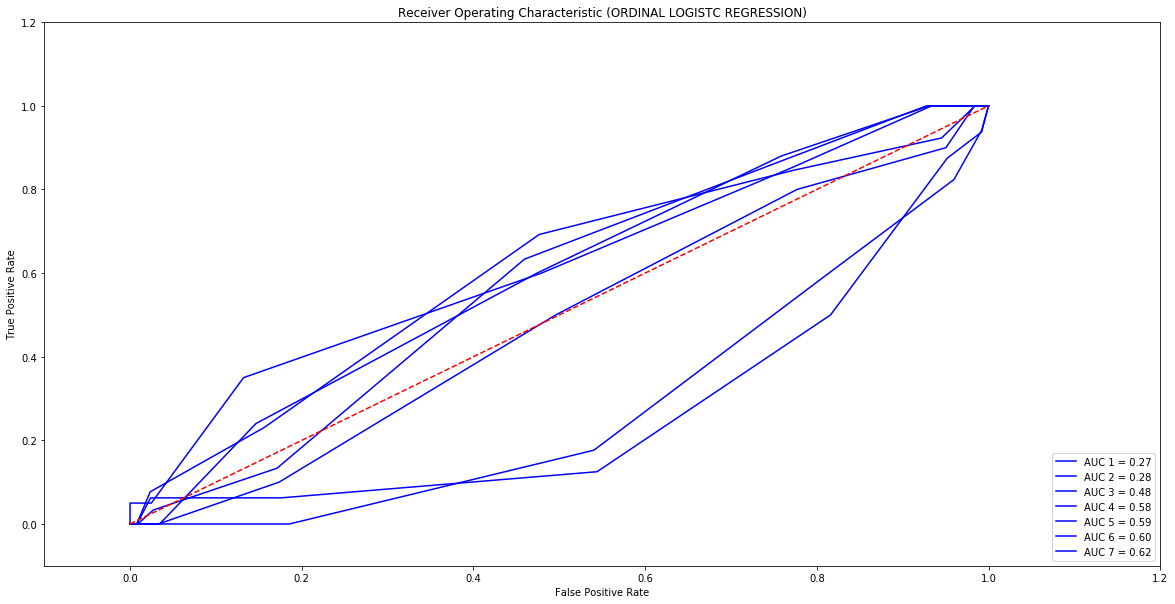

In [20]:
#Try create a ROC curve for the ordinal logistic regression model
plt.figure(figsize=(20, 10))

for round in range(1, 8):
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_Test, ordinalPredictions, pos_label = round)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC %d = %0.2f' % (round, roc_auc))
     
##Plot the FPR vs. TPR
plt.title('Receiver Operating Characteristic (ORDINAL LOGISTC REGRESSION)')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC Curve(Ordinal Logistic Regression)")
plt.show()
